In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import scipy.stats as scstat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pycountry

In [22]:
data = {
    "day_month": [
        "18/11","19/11","20/11","21/11","22/11","23/11","24/11","25/11",
        "26/11","27/11","28/11","29/11","30/11",
        "1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12",
        "10/12","11/12","12/12","13/12","14/12","15/12","16/12","17/12"
    ],
    "minutes": [
        2, 3, 2, 3, 0, 0, 8, 4, 0.8333, 1, 2, 1, 2,
        5, 2, 3, 5, 2, 3, 6, 1, 3, 2, 2, 3, 3, 2, 1, 7, 7
    ]
}

df = pd.DataFrame(data)

In [23]:
df["date"] = pd.to_datetime(df["day_month"] + "/2025", format="%d/%m/%Y")
df = df.drop(columns="day_month")
df["weekday"] = df["date"].dt.day_name()
df

,minutes,date,weekday
0,2.0000,2025-11-18,Tuesday
1,3.0000,2025-11-19,Wednesday
2,2.0000,2025-11-20,Thursday
3,3.0000,2025-11-21,Friday
4,0.0000,2025-11-22,Saturday
5,0.0000,2025-11-23,Sunday
6,8.0000,2025-11-24,Monday
7,4.0000,2025-11-25,Tuesday
8,0.8333,2025-11-26,Wednesday
9,1.0000,2025-11-27,Thursday


In [24]:
df.describe()

,minutes,date
count,30.000000,30
mean,2.861110,2025-12-02 12:00:00
min,0.000000,2025-11-18 00:00:00
25%,2.000000,2025-11-25 06:00:00
50%,2.000000,2025-12-02 12:00:00
75%,3.000000,2025-12-09 18:00:00
max,8.000000,2025-12-17 00:00:00
std,2.052046,NaN


Text(0.5, 1.0, 'Distribution of Minutes (2025)')

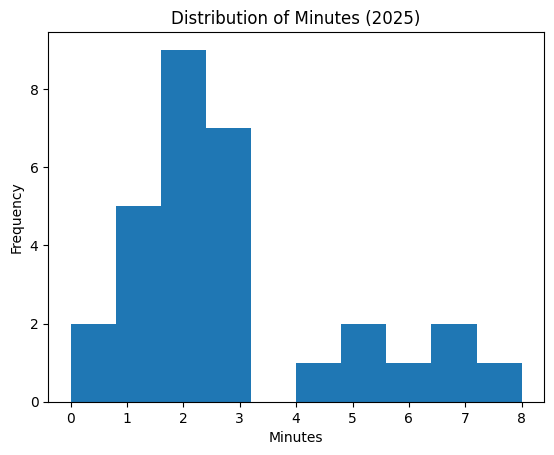

In [25]:
plt.figure()
plt.hist(df["minutes"], bins=10)
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.title("Distribution of Minutes (2025)")

In [26]:
talked_2_minutes = df[df["minutes"] == 2]

In [27]:
talked_2_minutes.head(10)

,minutes,date,weekday
0,2.0,2025-11-18,Tuesday
2,2.0,2025-11-20,Thursday
10,2.0,2025-11-28,Friday
12,2.0,2025-11-30,Sunday
14,2.0,2025-12-02,Tuesday
17,2.0,2025-12-05,Friday
22,2.0,2025-12-10,Wednesday
23,2.0,2025-12-11,Thursday
26,2.0,2025-12-14,Sunday


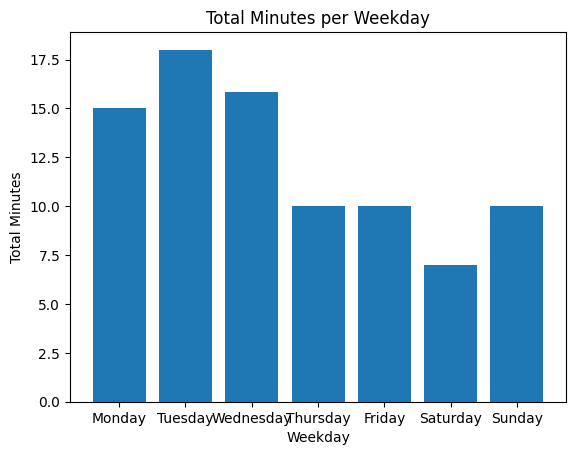

In [33]:
minutes_per_weekday = (
    df.groupby(df["date"].dt.day_name())["minutes"]
      .sum()
      .reindex([
          "Monday", "Tuesday", "Wednesday",
          "Thursday", "Friday", "Saturday", "Sunday"
      ])
)

plt.figure()
plt.bar(minutes_per_weekday.index, minutes_per_weekday.values)
plt.xlabel("Weekday")
plt.ylabel("Total Minutes")
plt.title("Total Minutes per Weekday")

plt.show()

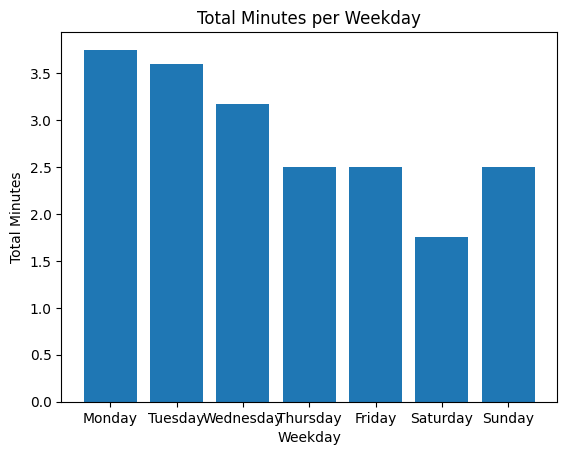

In [34]:
minutes_per_weekday = (
    df.groupby(df["date"].dt.day_name())["minutes"]
      .mean()
      .reindex([
          "Monday", "Tuesday", "Wednesday",
          "Thursday", "Friday", "Saturday", "Sunday"
      ])
)

plt.figure()
plt.bar(minutes_per_weekday.index, minutes_per_weekday.values)
plt.xlabel("Weekday")
plt.ylabel("Total Minutes")
plt.title("Total Minutes per Weekday")

plt.show()